In [7]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [ ]:
# Initialize the model, load the data
cfg, params, obs_data, um_data = asap.fitting.initial_model(config_file, verbose=True)

# Load in the final sampling results
(mod_result_samples, 
 mod_result_chains, 
 mod_result_lnprob, 
 mod_result_best, _, _) = io.load_npz_results(result_file)


In [4]:
asap_sample = np.load('asap_baryonification_B_sample.npz')

asap_sample.files

['samples', 'lnprob', 'best', 'mean', 'chains', 'position', 'acceptance']

In [8]:
asap_sample['best']

array([ 5.74201891e-01,  1.18184079e+01,  6.92319054e-03,  1.21962170e-02,
        7.69989709e-01, -1.75798197e-01,  3.51967642e-01])

In [9]:
no_baryonification_truths = [0.602, 11.846, -0.012, 0.003, 0.649,
                            -0.176, 0.377]
#from https://arxiv.org/pdf/1811.01139.pdf

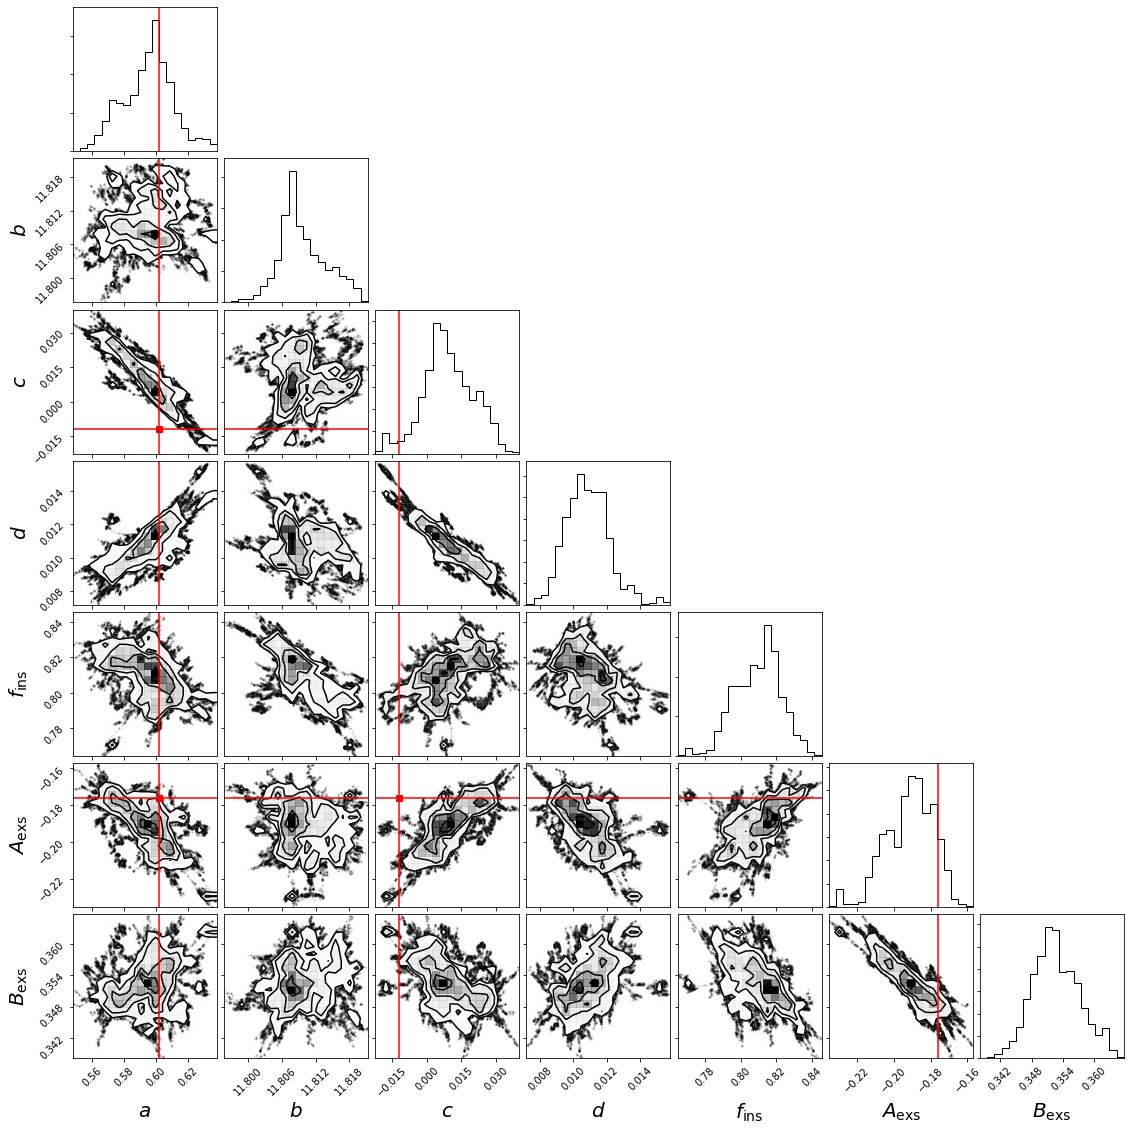

In [21]:
params_label = [r'$a$', r'$b$', r'$c$', r'$d$', 
                r'$f_{\rm ins}$', r'$A_{\rm exs}$', r'$B_{\rm exs}$']

params_range = [(0.56, 0.62), (11.800, 11.818), 
                (-0.02, 0.04), (0.01, 0.015), 
                (0.78, 0.84), 
                (-0.22, -0.162), (0.29, 0.41)]
title_fmt = '.3f'

figure = corner.corner(asap_sample['samples'], truths=no_baryonification_truths, labels= params_label,
              title_fmt = title_fmt, truth_color='red', label_kwargs={'fontsize':20}) #range = params_range,